<a href="https://colab.research.google.com/github/2SUBDA/Breakouts/blob/master/Week9_Keras_WalkThrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# BASIC WALK THROUGH FOR MNIST NN
# BASED ON KERAS TUTORIALS (2019)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [4]:
# OBTAIN

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# SCRUB
# FLATTEN 28 x 28 IMAGE TO 784 VECTOR
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
# SCRUB
# NORMALIZE INPUTS FROM RGB COLOR TO 0-1
X_train = X_train / 255
X_test = X_test / 255

In [0]:
# SCRUB
# THE OLD ONE HOT ENCODE - CONVERT "CATEGORICAL" CLASSIFICATION TO ENCODE
# A "BINARIZATION" OF THE CATEGORIES
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
# MODEL
# BUILD THE BASELINE

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model 

In [11]:
# MODEL
# RUN THE MODEL

model = baseline_model()

# FIT THE MODEL

history  = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=1000, verbose=2)

# EVALUATE THE MODEL
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/300
 - 6s - loss: 0.3139 - acc: 0.9119 - val_loss: 0.1631 - val_acc: 0.9534
Epoch 2/300
 - 6s - loss: 0.1273 - acc: 0.9632 - val_loss: 0.1078 - val_acc: 0.9673
Epoch 3/300
 - 6s - loss: 0.0836 - acc: 0.9764 - val_loss: 0.0865 - val_acc: 0.9750
Epoch 4/300
 - 6s - loss: 0.0608 - acc: 0.9825 - val_loss: 0.0822 - val_acc: 0.9756
Epoch 5/300
 - 6s - loss: 0.0464 - acc: 0.9869 - val_loss: 0.0671 - val_acc: 0.9795
Epoch 6/300
 - 6s - loss: 0.0340 - acc: 0.9903 - val_loss: 0.0718 - val_acc: 0.9779
Epoch 7/300
 - 6s - loss: 0.0266 - acc: 0.9934 - val_loss: 0.0643 - val_acc: 0.9808
Epoch 8/300
 - 6s - loss: 0.0196 - acc: 0.9957 - val_loss: 0.0587 - val_acc: 0.9811
Epoch 9/300
 - 6s - loss: 0.0151 - acc: 0.9970 - val_loss: 0.0611 - val_acc: 0.9810
Epoch 10/300
 - 6s - loss: 0.0116 - acc: 0.9980 - val_loss: 0.0629 - val_acc: 0.9817
Epoch 11/300
 - 6s - loss: 0.0083 - acc: 0.9989 - val_loss: 0.0576 - val_acc: 0.9823
Epoch 12/300
 - 6s - los

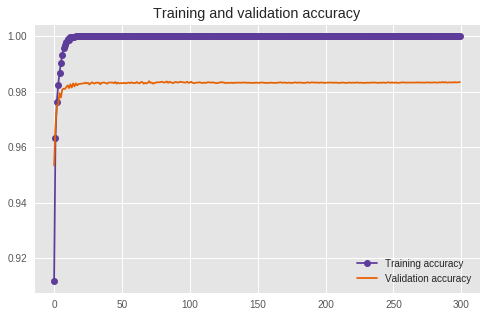

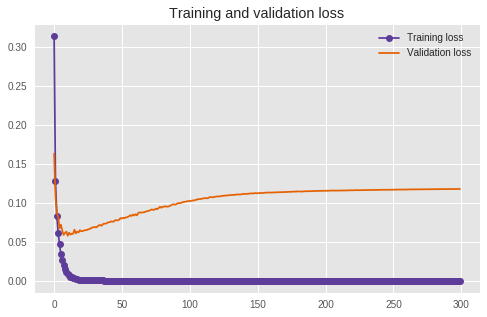

In [17]:
# INTERPRET 
# BUILD FUNCTION FOR PLOTTING THE RESULTS OF THE MODEL

def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)